
I tried out a few learning rates and iterations and I can't seem to get past a .0003 error rate no matter how many iterations I put it at, and the learning rate is most accurate at .01, .1 does not converge very well and .001 is not as accurate causing me to believe that it isn't learning fast enough. For my normalization method I used the min/max method subtracting each element by the minimum value and then dividing by the max value subtracted by the min value.

For placeholder 3 I calculated the residualError by finding the expected value (dot product of X and theta) and subtracted the actual value (y). I then used a formula I found at "https://stackoverflow.com/questions/17784587/gradient-descent-using-python-and-numpy" for gradient descent where the dot product of the X vector transposed and the residualError all over m (the length of the output) are found for the gradient. The change and theta were already calculated for me so I left those be. To calculate the cost I summed up the values of the residualError sqaured and then divided by 2*m, which was then appended to the cost array.

At first I was using the transpose of theta from the formula provided in the slides to find the gradient and cost function but was getting odd results. I then went online to find a different approach to the problem that used the transpose of X to find the gradient and was very pleased with my results. One thing that I did alter is that I took out the print statements for each iteration for the cost function so that it wouldn't take up so much space in the report. I also took all the files and condensed them into one file for simplicity in the jupyter notebook. During this assignment I learned how to normalize a data vector, and how to effectively find the gradient descent for a multivariable machine learning problem.

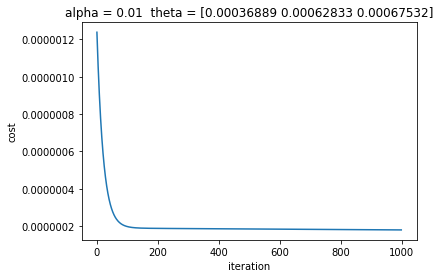

results: 0.0003595715040199083 (0.0003056954095199245)


In [57]:
#GD.py

import numpy as np
from pandas import read_table
import matplotlib.pyplot as plt
# X          - single array/vector
# y          - single array/vector
# theta      - single array/vector
# alpha      - scalar
# iterations - scarlar

def gradientDescent(X, y, theta, alpha, numIterations):
    '''
    # This function returns a tuple (theta, Cost array)
    '''
    m = len(y)
    arrCost =[];
    transX = np.transpose(X) # transpose X into a vector  -> XColCount X m matrix
    for iteration in range(0, numIterations):
        ################PLACEHOLDER3 #start##########################
        # write your codes to update theta, i.e., the parameters to estimate.
        expected = np.dot(X, theta)
        residualError =  expected - y
        gradient = np.dot(transX, residualError) / m
        change = [alpha * x for x in gradient]
        theta = np.subtract(theta, change)  # theta = theta - alpha * gradient
        ################PLACEHOLDER3 #end##########################

        ################PLACEHOLDER4 #start##########################
        # calculate the current cost with the new theta; 
        atmp = np.sum(residualError ** 2) / (2 * m)
#         cost = (1 / m) * np.sum(residualError ** 2)
#         print(atmp)
        arrCost.append(atmp)
        ################PLACEHOLDER4 #start##########################

    return theta, arrCost


#dataNormalization.py

def rescaleNormalization(dataArray):
    min = dataArray.min()
    denom = dataArray.max() - min
    newValues = []
    for x in dataArray:
        newX = (x - min) / denom
        newValues.append(newX)
    return newValues

def rescaleMatrix(dataMatrix):
    colCount = len(dataMatrix[0])
    rowCount = len(dataMatrix)
    newMatrix = np.zeros(dataMatrix.shape) 
    for i in range(0, colCount):
        min = dataMatrix[:,i].min()
        denom = dataMatrix[:,i].max() - min
        for k in range(0, rowCount):
            newX = (dataMatrix[k,i] - min) / denom
            newMatrix[k,i] = newX
    return newMatrix


def meanNormalization(dataArray):
    mean = np.mean(dataArray)
    denom = dataArray.max() - dataArray.min()
    newValues = []
    for x in dataArray:
        newX = (x - mean) / denom
        newValues.append(newX)
    return newValues



#download_data.py

def download_data(fileLocation, fields):
    '''
    Downloads the data for this script into a pandas DataFrame. Uses columns indices provided
    '''

    frame = read_table(
        fileLocation,
        
        # Specify the file encoding
        # Latin-1 is common for data from US sources
        encoding='latin-1',
        #encoding='utf-8',  # UTF-8 is also common

        # Specify the separator in the data
        sep=',',            # comma separated values

        # Ignore spaces after the separator
        skipinitialspace=True,

        # Generate row labels from each row number
        index_col=None,

        # Generate column headers row from each column number
        header=0,          # use the first line as headers

        usecols=fields
    )

    # Return the entire frame
    return frame

#main_h3.py

# from download_data import download_data
# from GD import gradientDescent
# from dataNormalization import rescaleMatrix
# Starting codes for ha3 of CS596.

#NOTICE: Fill in the codes between "%PLACEHOLDER#start" and "PLACEHOLDER#end"

# There are two PLACEHODERS IN THIS SCRIPT

# parameters

################PLACEHOLDER1 #start##########################
# test multiple learning rates and report their convergence curves. 
ALPHA = 0.01
MAX_ITER = 1000
################PLACEHOLDER1 #end##########################

#% step-1: load data and divide it into two subsets, used for training and testing
sat = download_data('sat.csv', [1, 2, 4]).values # three columns: MATH SAT, VERB SAT, UNI. GPA  # convert frame to matrix

################PLACEHOLDER2 #start##########################
# Normalize data
# using pandas functions that provide mean of a series and standard deviation of a series to find mean normalization
sat= (sat - sat.min()) / (sat.max() - sat.min())
# sat = rescaleMatrix(sat) # please replace this code with your own codes
################PLACEHOLDER2 #end##########################

 
# training data;
satTrain = sat[0:60, :]
# testing data; 
satTest = sat[60:len(sat),:]

#% step-2: train a linear regression model using the Gradient Descent (GD) method
# ** theta and xValues have 3 columns since have 2 features: y = (theta * x^0) + (theta * x^1) + (theta * x^2)
theta = np.zeros(3) 

xValues = np.ones((60, 3)) 
xValues[:, 1:3] = satTrain[:, 0:2]
yValues = satTrain[:, 2]
# call the GD algorithm, placeholders in the function gradientDescent()
[theta, arrCost] = gradientDescent(xValues, yValues, theta, ALPHA, MAX_ITER)

 
#visualize the convergence curve
plt.plot(range(0,len(arrCost)),arrCost);
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('alpha = {}  theta = {}'.format(ALPHA, theta))
plt.show()

#% step-3: testing
testXValues = np.ones((len(satTest), 3)) 
testXValues[:, 1:3] = satTest[:, 0:2]
tVal =  testXValues.dot(theta)
 

#% step-4: evaluation
# calculate average error and standard deviation
tError = np.sqrt([x**2 for x in np.subtract(tVal, satTest[:, 2])])
print('results: {} ({})'.format(np.mean(tError), np.std(tError)))